El objetivo de este [challenge](https://www.kaggle.com/c/bms-molecular-translation/overview) es el de generar texto dada una imagen (*image captioning*). 

In [3]:
import os
from pathlib import Path

path = Path('data')
os.listdir(path)

['sample_submission.csv', 'test', 'train', 'train_labels.csv']

In [7]:
import pandas as pd

train_labels = pd.read_csv(path / 'train_labels.csv')
train_labels

,image_id,InChI
0,000011a64c74,InChI=1S/C13H20OS/c1-9(2)8-15-13-6-5-10(3)7-12...
1,000019cc0cd2,InChI=1S/C21H30O4/c1-12(22)25-14-6-8-20(2)13(1...
2,0000252b6d2b,InChI=1S/C24H23N5O4/c1-14-13-15(7-8-17(14)28-1...
3,000026b49b7e,InChI=1S/C17H24N2O4S/c1-12(20)18-13(14-7-6-10-...
4,000026fc6c36,InChI=1S/C10H19N3O2S/c1-15-10(14)12-8-4-6-13(7...
...,...,...
2424181,ffffe824f539,InChI=1S/C10H12F2N2O3/c1-17-7-2-5(3-8(15)16)9(...
2424182,ffffea1ebdfa,InChI=1S/C19H20F2N4O3S/c1-10(8-20)28-14-7-12(2...
2424183,ffffee2b4534,InChI=1S/C22H26Cl2N2O4S/c1-16-6-2-3-10-21(16)3...
2424184,fffff0b6eea6,InChI=1S/C17H26N2O6S/c1-23-16-12-14(4-5-15(16)...


In [19]:
def get_image_path(image_id):
    return path / 'train' / image_id[0] / image_id[1] / image_id[2] / f'{image_id}.png'

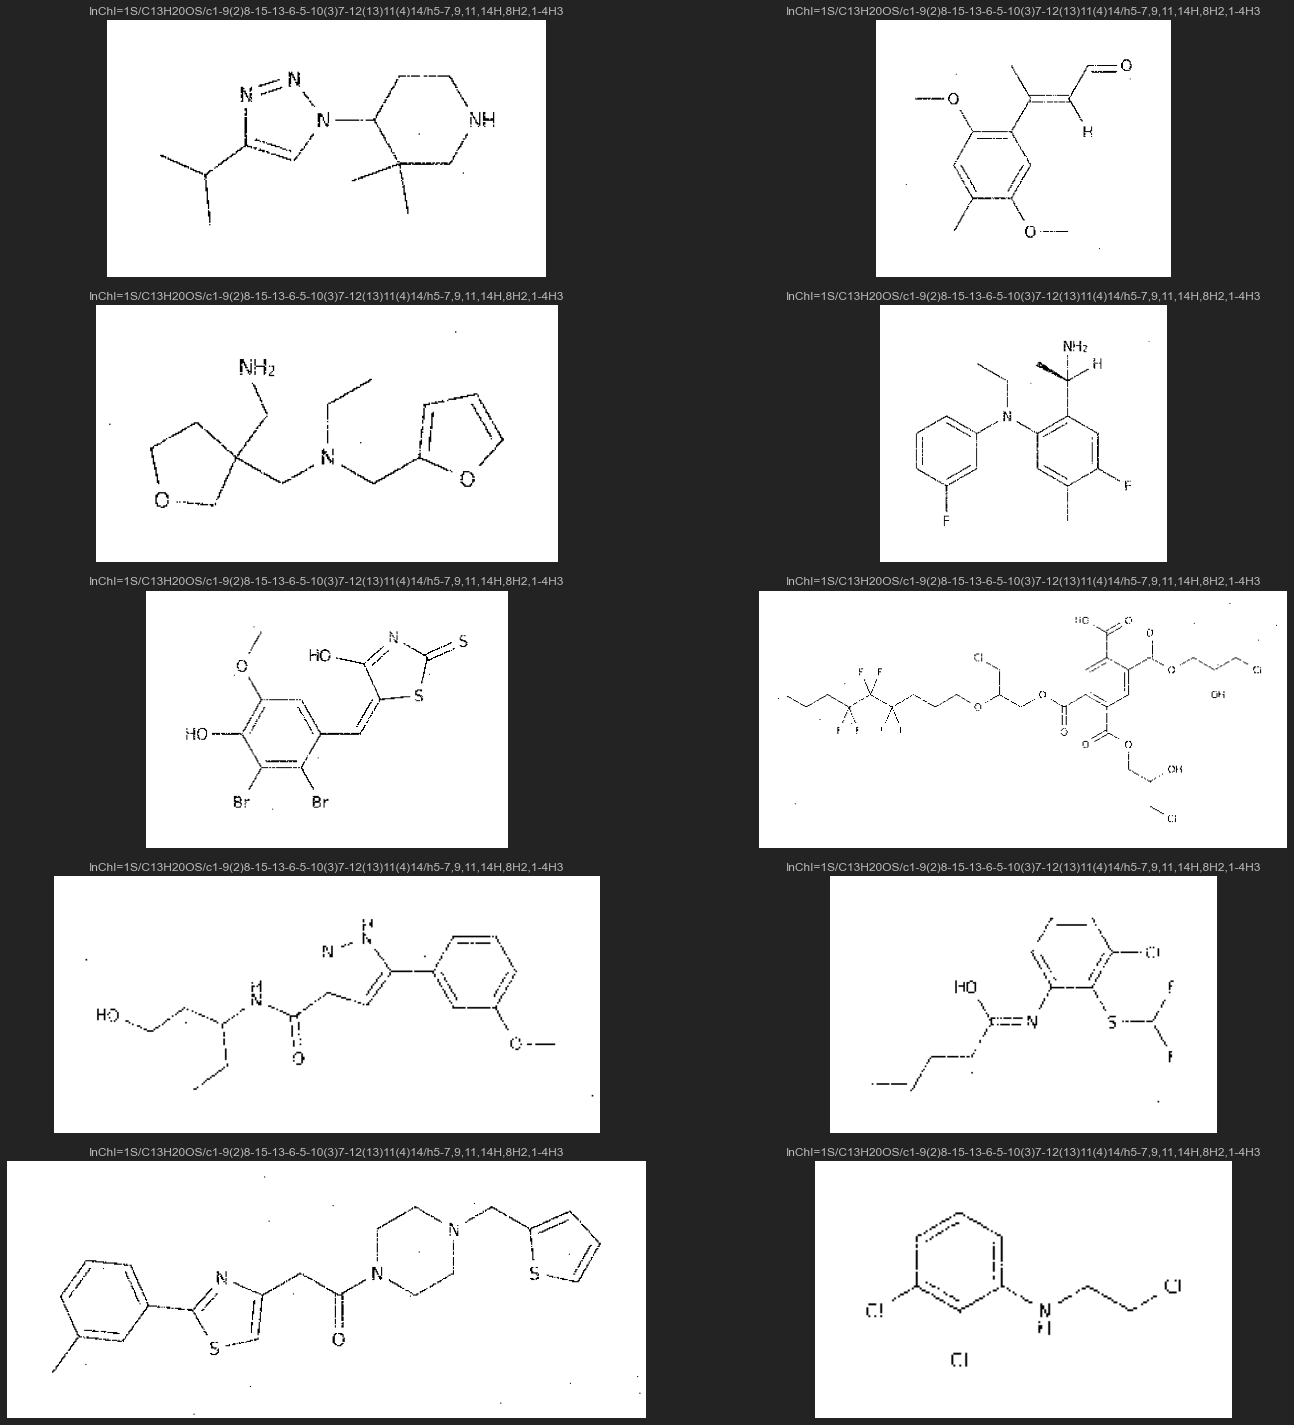

In [44]:
import matplotlib.pyplot as plt
from skimage import io
import random

rows, columns = 5, 2
fig = plt.figure(figsize=(20,20))
for r in range(rows):
    for c in range(columns):
        ix = random.randint(0, len(train_labels)-1)
        image_id = train_labels.image_id[ix]
        img_path = get_image_path(image_id)
        image = io.imread(img_path)
        ax = plt.subplot(rows, columns, r*columns + c + 1)
        ax.imshow(image, cmap="gray")
        ax.axis('off')
        ax.set_title(train_labels.InChI[0], size=12)
plt.tight_layout()
plt.show()

100%|████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<?, ?it/s]


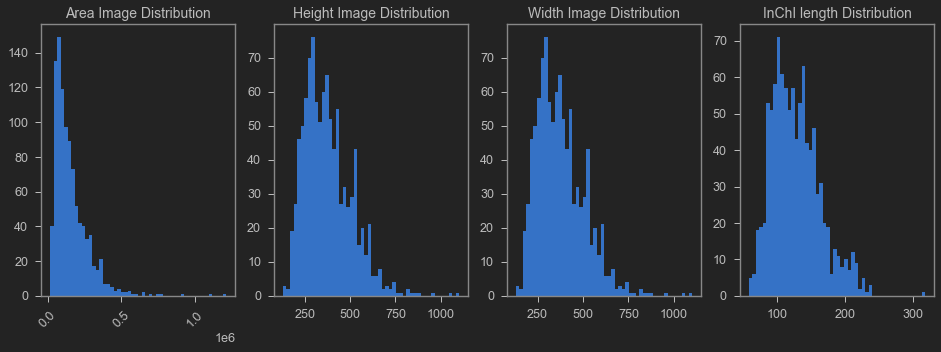

In [56]:
from tqdm import tqdm

ws, hs, ls = [], [], []
for image_id in tqdm(train_labels.sample(1000).image_id):
    img_path = get_image_path(image_id)
    image = io.imread(img_path)
    hs.append(image.shape[1])    
    ws.append(image.shape[1])
    
for InChI in tqdm(train_labels.sample(1000).InChI):
    ls.append(len(InChI))

plt.figure(figsize=(16, 5))
plt.subplot(1, 4, 1)
plt.hist(np.array(hs) * np.array(ws), bins=50)
plt.xticks(rotation=45)
plt.title("Area Image Distribution", fontsize=14)
plt.subplot(1, 4, 2)
plt.hist(hs, bins=50)
plt.title("Height Image Distribution", fontsize=14)
plt.subplot(1, 4, 3)
plt.hist(ws, bins=50)
plt.title("Width Image Distribution", fontsize=14);
plt.subplot(1, 4, 4)
plt.hist(ls, bins=50)
plt.title("InChI length Distribution", fontsize=14);
plt.show()

In [58]:
train_labels.InChI.map(len).min(), train_labels.InChI.map(len).max()

(32, 403)

In [52]:
sample_submission = pd.read_csv(path / 'sample_submission.csv')
sample_submission

,image_id,InChI
0,00000d2a601c,InChI=1S/H2O/h1H2
1,00001f7fc849,InChI=1S/H2O/h1H2
2,000037687605,InChI=1S/H2O/h1H2
3,00004b6d55b6,InChI=1S/H2O/h1H2
4,00004df0fe53,InChI=1S/H2O/h1H2
...,...,...
1616102,ffffcdb2e39e,InChI=1S/H2O/h1H2
1616103,ffffcfddd770,InChI=1S/H2O/h1H2
1616104,ffffe4ab06b2,InChI=1S/H2O/h1H2
1616105,ffffec4033ec,InChI=1S/H2O/h1H2
